### ⏭ **Step 5: Analysis of Docking Results**

This step guides you through analyzing the docking results using AutoDock and visualizing receptor-ligand interactions in PyMOL. You will evaluate low-energy docked conformations, save the results, and compare the docked structure with the crystal structure.

#### **1. Open the Docking Output File**
- The output file for docking calculations is `*.dlg` (in this case, `hivreceptordock.dlg`).
- Navigate to: `Analysis > Docking > Open`.
- Select the file `hivreceptordock.dlg` and click `OK`.

#### **2. Load the Receptor**
Open the macromolecule: `File > Read Molecule > hivreceptor.pdbqt`.The protein and ligand are displayed on the screen.

#### **3. Analyze Docked Conformations**
Navigate to: `Analyse > Conformation > Play`, ranked by energy.

A pop-up window will appear:
   - Click `&` to display conformation information.
   - `Show Info` to view docking energy and inhibition constant information.

Use the play menu to display docked conformations:
   Enter `1, 2, 3, …` to display conformations ranked by energy (1 being the lowest-energy conformation).

#### **4. Evaluate and Save Low-Energy Conformations**
Analyze 5 to 10 low-energy conformations for final representation:
   - AutoDock calculations have an error of ±2 kcal.
   - Use **Play, ranked by energy** to identify and display all structures within 2 kcal of the lowest energy conformation.

Save docked structures:
   - Select the current conformation and click **Write Current**.
   - Save as `hivligdock1.pdbqt` for the first low-energy structure.
   - Display structure 2 using the play menu and save as `hivligdock2.pdbqt` for the second low-energy structure.

#### **5. Compare the Docked Structure with the Crystal Structure**
Open PyMOL and load the receptor and docked structure:
   - `File > Open`:
     - Load `hivreceptor.pdbqt`.
     - Load `hivligdock1.pdbqt`.
Load the crystal structure (1QBR) to compare:
   - `File > Open` and load `1QBR.pdb`.

Color and label the structures for comparison:
   - Use `magenta` for the crystal structure (`1QBR`).
   - Use `cyan` for the docked ligand (`hivligdock1.pdbqt`).

Observe:
   - There may be slight differences in the docked pose and the crystal structure, reflecting the inherent flexibility of the docking process.

#### **Command Mode for PyMOL**
You can perform the analysis in PyMOL using commands:

```python
# Load receptor, docked ligand, and crystal structure
load hivreceptor.pdbqt
load hivligdock1.pdbqt
load 1QBR.pdb

# Color the structures
color magenta, 1QBR
color cyan, hivligdock1

# Display receptor as cartoon and docked ligand as sticks
show cartoon, hivreceptor
show sticks, hivligdock1

# Highlight the binding site for comparison
select binding_site, byres hivreceptor within 5 of hivligdock1
show surface, binding_site
color red, binding_site
```
### **Visualization in PyMOL**
1. Magenta: Crystal structure (`1QBR`).
2. Cyan: Docked ligand (`hivligdock1.pdbqt`).

Observe the overlay of the docked pose and crystal structure. There may be slight differences due to the flexibility of the docking algorithm and the dynamic nature of the protein-ligand interaction.

### **GUI or Command Mode Needed?**
- **Analysis in AutoDock**: Requires **GUI** to analyze conformations, view energies, and save docked structures.
- **Comparison and Visualization in PyMOL**: Can be done using either **command mode** or **GUI**, depending on user preference.

This ensures a comprehensive docking analysis and structural comparison.

## **PML Script for Docking Analysis and Comparison**

In [1]:
with open("2.3 Docking_Results_Analysis.pml", "w") as scriptout:
    # Step 1: Load Receptor, Docked Ligand, and Crystal Structure
    scriptout.write("load hivreceptor.pdbqt, receptor\n")  # Load receptor (HIV protease enzyme example)
    scriptout.write("load hivligdock1.pdbqt, docked_ligand\n")  # Load docked ligand
    scriptout.write("fetch 1QBR, crystal_structure, async=0\n")  # Fetch the crystal structure (PDB ID: 1QBR)

    # Step 2: Hide everything initially
    scriptout.write("hide everything, all\n")  # Clean the view

    # Step 3: Visualize Receptor, Docked Ligand, and Crystal Structure
    scriptout.write("show cartoon, receptor\n")  # Show receptor as cartoon
    scriptout.write("color cyan, receptor\n")  # Color receptor cyan
    scriptout.write("show sticks, docked_ligand\n")  # Show docked ligand as sticks
    scriptout.write("color yellow, docked_ligand\n")  # Color docked ligand yellow
    scriptout.write("show cartoon, crystal_structure\n")  # Show crystal structure as cartoon
    scriptout.write("color magenta, crystal_structure\n")  # Color crystal structure magenta

    # Step 4: Highlight the Binding Site
    scriptout.write("select binding_site, byres receptor within 5 of docked_ligand\n")  # Select residues within 5 Å of ligand
    scriptout.write("show surface, binding_site\n")  # Show surface for the binding site
    scriptout.write("color red, binding_site\n")  # Color binding site red

    # Step 5: Measure Interactions
    scriptout.write("distance hbond1, docked_ligand and name O, binding_site and name N\n")  # Measure H-bond distance
    scriptout.write("distance contact1, docked_ligand and name C1, binding_site and name CA\n")  # Measure specific contact distance
    scriptout.write("hide labels, all\n")  # Hide labels for cleaner visualization

    # Step 6: Identify Interaction Types
    # Hydrophobic Interactions
    scriptout.write("select hydrophobic, byres (docked_ligand within 4 and hydro)\n")  # Select hydrophobic residues
    scriptout.write("show sticks, hydrophobic\n")  # Show hydrophobic residues
    scriptout.write("color orange, hydrophobic\n")  # Color hydrophobic residues orange

    # Ionic Interactions
    scriptout.write("select charged_residues, resn ARG+LYS+ASP+GLU and (docked_ligand around 4)\n")  # Select charged residues
    scriptout.write("show sticks, charged_residues\n")  # Show ionic interactions as sticks
    scriptout.write("color red, charged_residues\n")  # Color ionic residues red

    # Step 7: Set Transparency and Refine View
    scriptout.write("set transparency, 0.3, binding_site\n")  # Adjust binding site transparency
    scriptout.write("zoom (receptor or docked_ligand or crystal_structure)\n")  # Focus on all loaded structures

    # Step 8: Save Visualization and Session
    scriptout.write("png docking_comparison.png, dpi=300\n")  # Save a high-quality PNG of the visualization
    scriptout.write("save docking_analysis_session.pse\n")  # Save the session for further use

    # Notes for Analysis
    scriptout.write("# Notes:\n")
    scriptout.write("# - Receptor is colored cyan.\n")
    scriptout.write("# - Docked ligand is yellow.\n")
    scriptout.write("# - Crystal structure is magenta.\n")
    scriptout.write("# - Binding site is highlighted in red surface.\n")
    scriptout.write("# - Hydrophobic residues are orange, ionic residues are red.\n")


## **Questions/Problems and Possible Solutions**
### ❓ **A) I do not have any PDB file for the small molecule ligand. Can I generate the 3D structure of my own ligand?**

**Sketching and generating 3D structure of a ligand**

So far, we looked at the docking of ligand to protein using the 3D structures available on protein data bank. If you want to create a new ligand and dock it to the protein of interest, we need to create 3D structure of the ligand. We will create a new molecule and sketch that and create a 3D structure of the molecule as a ligand.


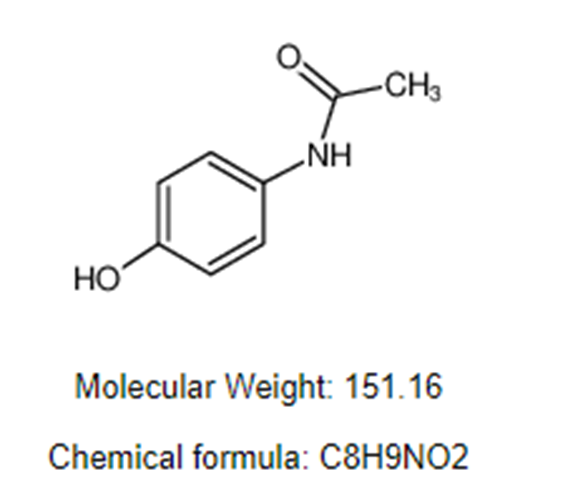

### 🌟 **Activity: Sketching Acetaminophen Molecule and Preparing for Docking**

This step involves creating a 3D structure of acetaminophen using an online cheminformatics tool and preparing it for docking studies.

#### **1. Access the Online Cheminformatics Tool**
- Open the **e-Drug 3D** platform (or any equivalent cheminformatics tool).
- Navigate to the **Draw and Convert a Molecule** section.

#### **2. Sketch the Acetaminophen Molecule**
**Sketch Window**:
   - Use the drawing tools to sketch the structure of acetaminophen (paracetamol).
   - Acetaminophen structure consists of:
     - A benzene ring.
     - A hydroxyl group (-OH) at one position.
     - An amide group (-NHCOCH3) at another position.

**Convert to SDF**:
   - Click the **Convert to SDF** button.
   - The tool will generate a 3D SDF (Structure Data File) format of the molecule.

#### **3. Generate 3D Conformations**
From the **3D Structure Window**:
   - Click **Generate 3D SDF**.
   - You may provide options for generating multiple conformations if desired.

Verify the 3D structure in the visualization panel.

#### **4. Download the Molecule**
Download the 3D structure in PDB format:
   - Click the `Download PDB` button in the tool.
   - Save the file as `acetaminophen.pdb`.

#### **5. Use the PDB File for Docking**
The downloaded `acetaminophen.pdb` file can now be used as a **ligand** for docking studies with your protein of interest.

## ❓ **B) I have Chlorine and bromine atoms in my ligand, can I use docking method for these ligands?**

**Using Autodock when you have a ligand with halogens or other atoms.**

Many drug molecules have halogens in their chemical structure. When your ligand contains halogens such as chlorine, bromine, iodine you need to create the Grid using ligand and receptor both. Most of the proteins do not have these atoms and if you create a grid using protein receptor as explained in the above example, docking calculations do not run as grid files for halogens are not found. The example below provides creating a grid in Autodock when you have halogens in the ligand. Once you create the grid with halogen atoms, docking calculations are similar to the one explained above.


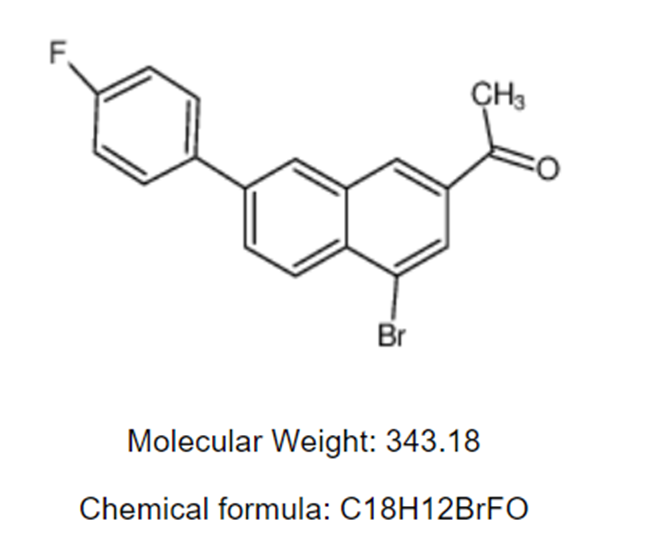

### 🌟 **Activity: Generating Grid for Chlorine and Bromine Atoms**

This activity involves using AutoGrid to create a grid specifically for chlorine and bromine atoms in a molecule, preparing the ligand and receptor for docking calculations.

### **Steps to Perform the Activity**

#### **1. Sketch the Molecule with Chlorine and Bromine**
i. Open an **Online Cheminformatics Tool** (e.g., e-Drug 3D).
ii. Use the **Sketch Window** to draw the molecule containing chlorine and bromine.
   - Include the desired functional groups and atomic arrangement.
iii. **Generate a 3D Structure**:
   - Convert the sketch to a **PDB format**.
   - Save the file as `molecule1.pdb`.

#### **2. Prepare the Ligand**
i. Open the ligand in AutoDock MGLTools:
   - Navigate to **Ligand > Open > Molecule1.pdb**.
ii. Save the ligand as a **PDBQT file**:
   - **Ligand > Save > PDBQT**.
   - Save the file as `molecule1.pdbqt`.

#### **3. Load the Receptor**
- Open the receptor file:
   - **File > Open > hiv1receptor.pdbqt**.
- Both ligand and receptor will now be displayed in the workspace.

#### **4. Create a Grid Box for Docking**
i. **Set Macromolecule**:
   - Go to **Grid > Macromolecule > Choose** and select `hiv1receptor.pdbqt`.

ii.**Set Map Types**:
   - Navigate to **Grid > Set Map Types > Directly**.
   - Then, go to **Grid > Set Map Types > Choose Ligand** and select `molecule1.pdbqt`.

iii.**Configure the Grid Box**:
   - Go to **Grid > GridBox**.
   - Adjust the grid box dimensions and spacing to encompass the receptor and ligand binding site.

iv. Save the Grid Parameter File (GPF):
   - **Grid > Output > Save GPF**.
   - Name the file `chlhivreceptor.gpf`.

#### **5. Edit the Grid Parameter File**
- Navigate to:
   - **Grid > Edit GPF**.
- Verify that the parameter file includes entries for bromine (`Br`) and chlorine (`Cl`) atoms.

#### **6. Docking Calculations**
- The prepared grid box includes all required atoms from the ligand and receptor.
- Docking calculations follow the same steps as previously outlined:
   - **Run AutoDock** with the prepared grid parameter file (`chlhivreceptor.gpf`) and docking parameter file (`hivreceptordock.dpf`).

### **Key Outputs**
- **Grid Parameter File** (`chlhivreceptor.gpf`) includes parameters for chlorine and bromine atoms.
- Docking calculations will utilize the grid box configured for the specified atoms.

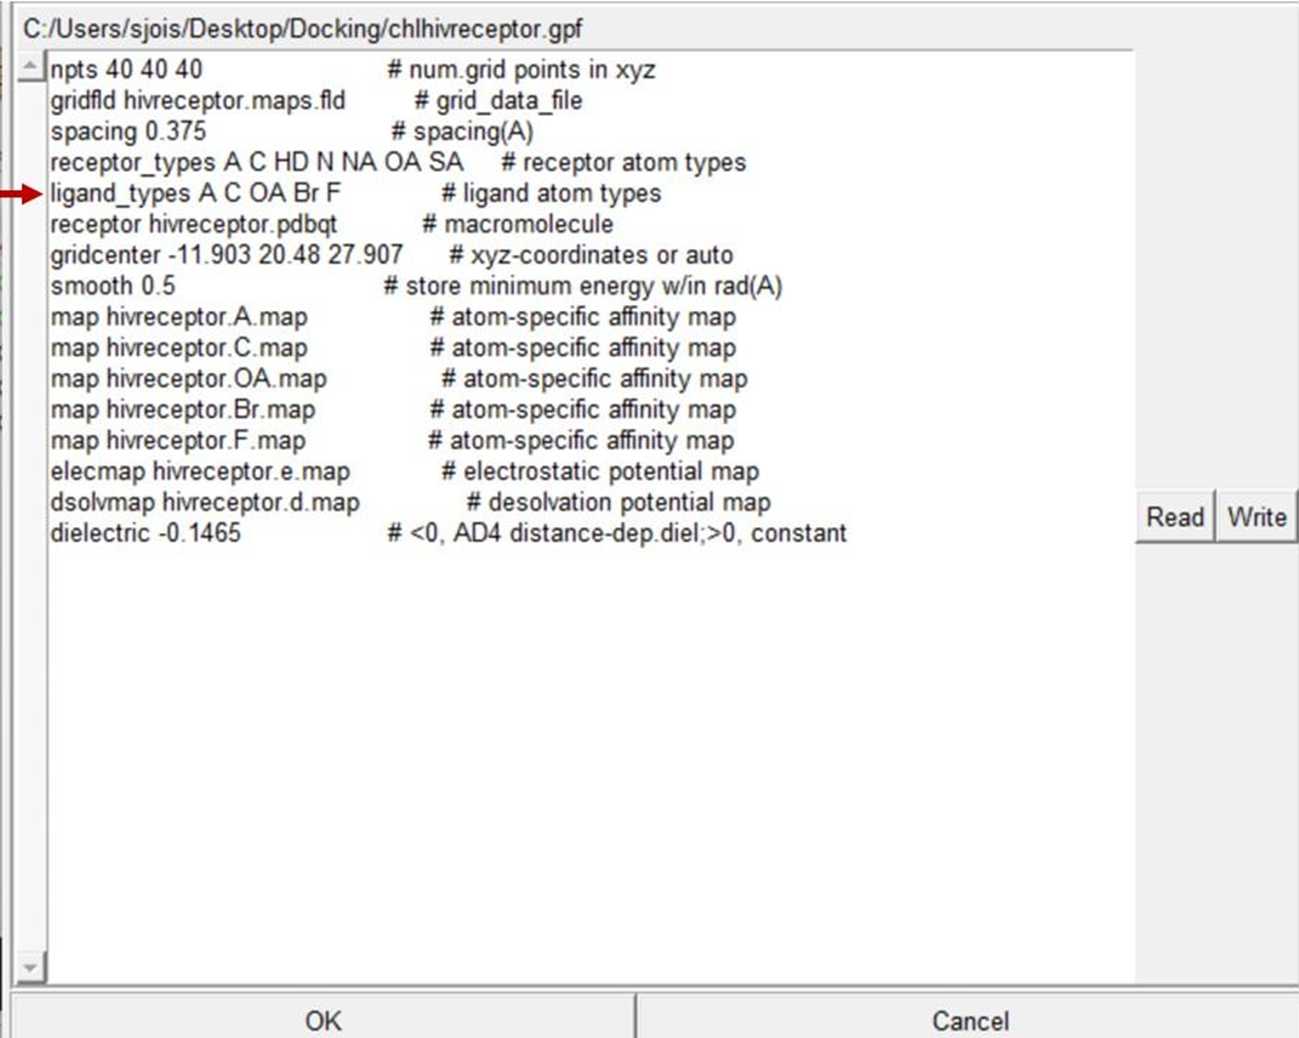

This activity demonstrates how to include specific atom types, such as chlorine and bromine, in grid generation for docking calculations using AutoGrid and AutoDock.

### ❓ **C) My protein is large and the grid box is small for my protein.**

You can use a small grid box around the possible binding site on the protein and perform docking calculations.

### ❓ **D) I have a boron atom in my molecule, can I use autodock?**
You can use it, but you have to create a forcefield parameter library for atoms that are not available in Autodock by default. Refer to xxx for how to create a new atom library for Autodock.

### ❓ **E) I have a molecule that has more than 32 rotatable bonds, and autodock has an option for 32 torsions. How do I resolve this issue?**

One way to tackle this problem is to use the most important torsions by selecting particular torsions and remaining non-rotatable. Another way is to obtain the source code for autodock and increase the number of torsions and recompile and run the autodock. Increasing the number of rotatable bonds can increase the calculation time.


## 📓 **Assignment**

Use the crystal structure of  CDK2 (2DS1.pdb) protein in complex with its inhibitor/ligand.  Use the crystal structure of the receptor without the ligand and the crystal structure of ligand to perform the docking of ligand to the receptor using Autodock. Notice that there are two steps in docking. 1) Creation of grid and, 2) docking. Use the PyMol software to remove water molecules from the receptor protein and prepare the grid for protein. To create the center of the grid you can use the crystal structure of the complex and decide the center of the grid.  Using autodock perform the docking calculations and based on output provide first five low energy docked structures of the ligand to the receptor. Use the Pymol to display docked structure with receptor and show the ligand site. Also, compare your docked structure to the crystal structure of the complex. Is there any difference in the docked structure and the crystal structure? Report the different components of docking energies for the lowest energy docked structure (Rank 1). The docking program also provides binding affinity of ligand. Report the binding affinity.

## **Protein-Protein docking**

Most of the docking methods used are for small molecule-protein docking. However, if you want to define the binding site of protein-protein interactions, you need protein docking methods since both proteins are large macromolecules. The docking of two proteins helps us to define the binding interface of two proteins and target protein-protein interaction inhibitors. Experimental methods such as X-ray crystallography and Cryo-electron microscopy are used to elucidate the structure of protein complexes. In many cases, the structure of individual proteins is known, and complex protein structures have to be modeled. Protein-protein docking methods are used to predict the structure of protein complexes. However, one must be cautious with the structure of complexes generated with such protein docking methods, as several possible binding modes are possible. If there is experimental information that can support a model, it should be evaluated and considered.
Why do we need the protein-protein complex structure model?
Protein-protein interactions are very important in many physiological processes in the human body.  These interactions help carry out many cellular processes. Any deregulation in protein-protein interaction may result in disease states. One of the examples of protein-protein interactions is epidermal growth factor receptor (EGFR) interactions. There are four EGFRs, EGFR (HER1), HER2, HER3 and HER4.  These EGFR proteins form dimers upon ligand binding and carry out signaling for cell growth and differentiation. Any deregulation or overproduction of this pathway leads to the formation of many dimers, resulting in the disease state. In such cases, protein-protein interaction needs to be modulated or inhibited. One of the methods of drug design is protein-protein interaction inhibition. To design inhibitors of protein-protein interactions of EGFRs, we need knowledge of the interacting surface of proteins.


### 🌟 **Activity: Modeling EGFR and HER2 Protein Complex Using ClusPro**

This activity focuses on using the **ClusPro protein-protein docking server** to model the interaction between the extracellular domains of EGFR (PDB ID: 3NJP) and HER4 (PDB ID: 8U4I).

### **Steps to Perform the Activity**

#### **1. Access ClusPro Docking Server**
1. Go to the ClusPro website: [https://cluspro.org/login.php](https://cluspro.org/login.php).
2. **Create an Account**:
   - Register with a username and password.
   - Provide an email address to receive the docking results.

#### **2. Prepare the Protein Structures Using PyMOL**

##### **a. Preparing EGFR Monomer**
1. Open the PDB file `3NJP` (EGFR homodimer) in PyMOL:
   `File > Get PDB > Enter PDB ID: 3NJP`
2. Remove one of the molecules from the homodimer:
   
   Use the GUI:
     - `Display > Sequence` to show the sequence bar.
     - Select the chain corresponding to one monomer (e.g., Chain A or Chain B).
     - On the right-hand menu, click `Action > Remove Atoms` for the selected chain.
   
   Or, use the command mode:
     ```python
     remove chain B
     ```
3. Remove the ligand peptide:
   
   Use the GUI:
     - Select the ligand using the sequence or visual selection.
     - **Action > Remove Atoms**.
   
   Or, use the command mode:
     ```python
     remove resn LIG
     ```
4. Remove solvent molecules:
   
   Use the GUI:
     - On the right-hand menu, **Action > Remove Solvent**.
   
   Or, use the command mode:
     ```python
     remove solvent
     ```
5. Save the cleaned structure:
   `File > Export Molecule`.
   Save as `EGFRm1.pdb`

##### **b. Preparing HER4 Monomer**
i. Open the PDB file `8U4I` (HER4 homodimer) in PyMOL:
   - **File > Get PDB > Enter PDB ID: 8U4I**.
ii. Remove one molecule from the homodimer:
   - Follow the same steps as for EGFR, using either the GUI or command mode:
     ```python
     remove chain B
     ```
iii. Remove the ligand peptide and solvent molecules using the same process as above.
iv. Save the cleaned structure:
   - Save as `HER4m1.pdb`.

##### **Command Mode vs GUI in PyMOL**
- The above steps (removal of chains, ligands, and solvent) can be performed using both the **PyMOL GUI** or the **command mode**.
- **Command mode** is faster for advanced users, while **GUI** is more user-friendly for beginners.

#### **3. Submit a Docking Job on ClusPro**
i. Log in to your ClusPro account.
ii. **Provide Job Details**:
   - Enter a **Job Name** (e.g., `testjois1`).
iii. **Upload the Receptor and Ligand**:
   - **Receptor**: Upload `EGFRm1.pdb`.
   - **Ligand**: Upload `HER4m1.pdb`.
iv. Click **Dock** to submit the job.

#### **4. Wait for the Results**
- The docking job will run on the server.
- Results are sent to your email or can be accessed by logging into ClusPro.
- The job may take several minutes to hours, depending on server load.

### **Output**
- The docking results will include multiple predicted receptor-ligand complexes ranked by clustering and energy scores.
- Analyze these results to select the most plausible interaction model.

This activity demonstrates how to prepare protein structures using PyMOL and perform protein-protein docking with ClusPro.

In Cluspro, the ligand is rotated with a particular number (n) of rotations, and for each rotation, the ligand is translated into x,y, and z relative to the receptor on a grid. We choose the translation with the best score from each rotation.
Among the n number of rotations 1000 rotation/translation combinations with the lowest score are chosen as possible models of the protein-protein complex.
(for details visit Cluspro website https://cluspro.org/login.php)
Once the job is completed you will receive an email and you can login and go to Results (menu bar at the top Cluspro website).
Job ID, Name and Status will be displayed. If the job is completed it will be indicated at Status.
Click on job ID number and your results will be displayed
For the example above, you will see the following results.

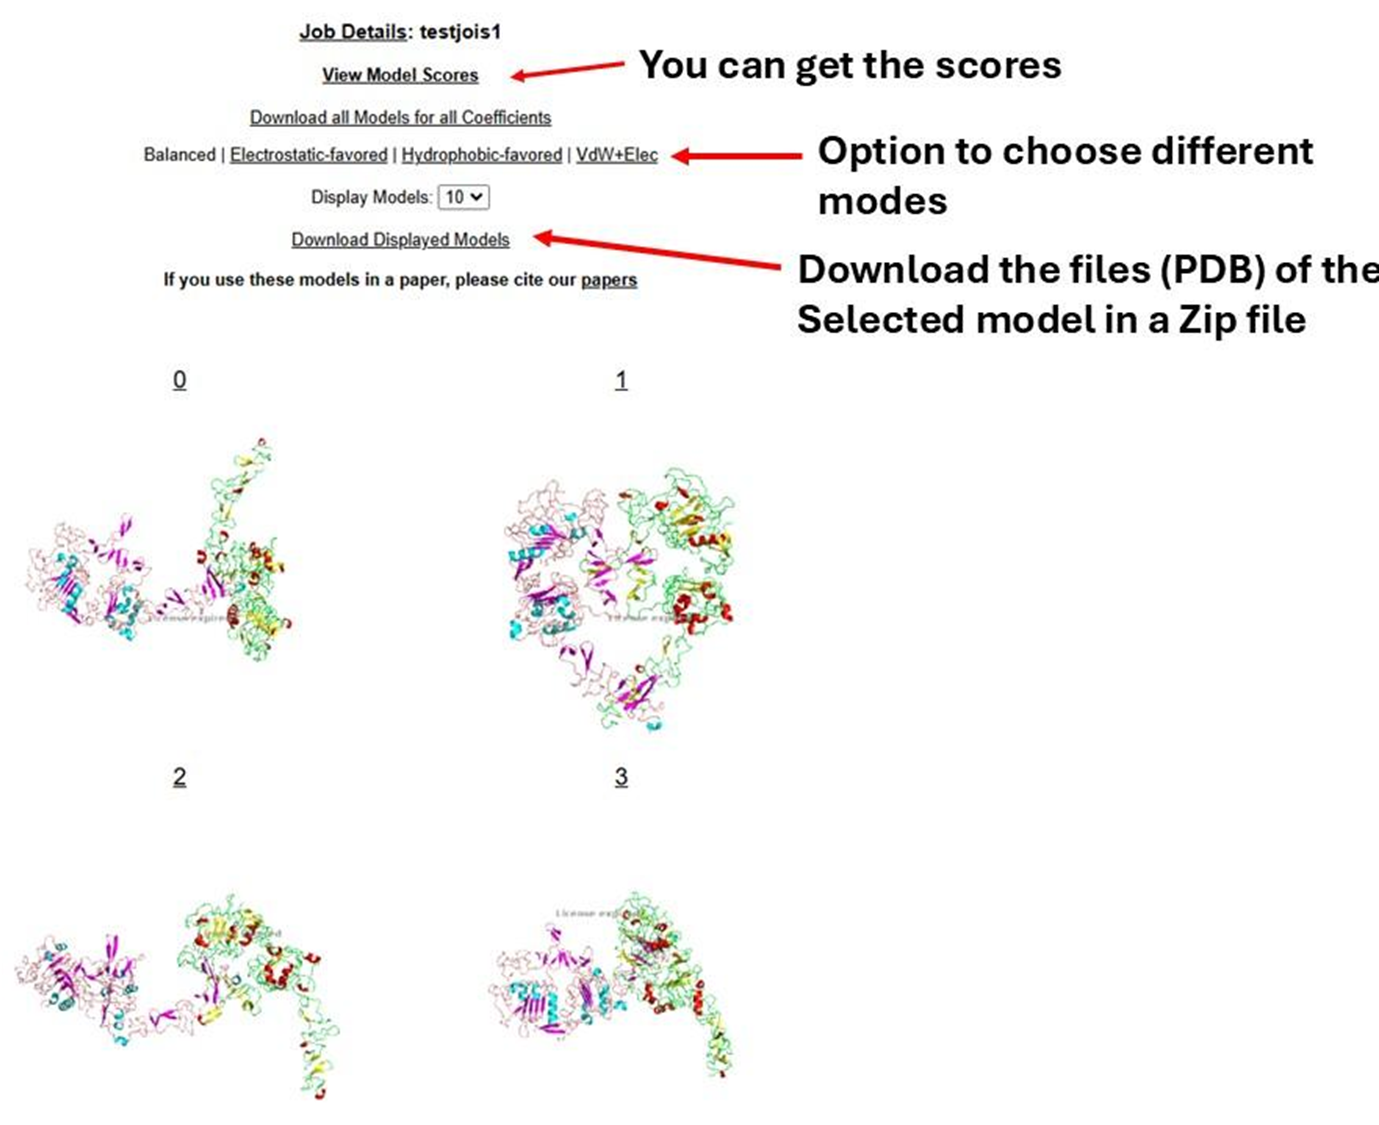

### **ClusPro Protein-Protein Docking**

In ClusPro, the ligand is rotated through a specified number (**n**) of rotations. For each rotation, the ligand is translated in the **x**, **y**, and **z** directions relative to the receptor on a grid. The translation with the **best score** for each rotation is selected.

Among the **n rotations**, ClusPro selects **1,000 rotation/translation combinations** with the lowest scores as possible models of the protein-protein complex.

(For more details, visit the ClusPro website: [https://cluspro.org/login.php](https://cluspro.org/login.php))


### **Accessing Results**
1. Once the job is completed, you will receive an email notification.
2. Alternatively, log in to ClusPro and navigate to the **Results** menu at the top of the page.
3. The `Job ID`, `Name`, and `Status` (e.g., "Completed") will be displayed.
4. If the job is completed, click on the **Job ID number** to view the results.


### **Results Analysis**
Display and download various protein models based on non-covalent interactions or models with balanced interactions.

**Selecting the Best Model**:
  - Use your knowledge of the two proteins and any experimental support to identify the best model.
  - Start with the **balanced model** (first choice on the ClusPro menu bar) if prior knowledge is unavailable.
  - ClusPro recommends the **balanced option and score** as the default for unknown protein-protein interactions.

### **Example**
- In this example, crystal structures of:
  
  `EGFR homodimer (PDB ID: 3NJP)`
  
  `HER2-HER3 complex (PDB ID: 7MN5)` are available on the Protein Data Bank.
- Based on these structures, the `cluster score`, and ranking, `Model 1` is identified as the best model for the `EGFR:HER4 complex`.

### **Viewing the Complex in PyMOL**
1. Use PyMOL to view the complex: Open the downloaded **Model 1** file (e.g., `model.002.01.pdb`).
2. Analyze the EGFR:HER4 complex model:
Identify secondary structures (**helices**, **beta sheets**) involved in complex formation. Observe how these elements contribute to stabilizing the interaction.

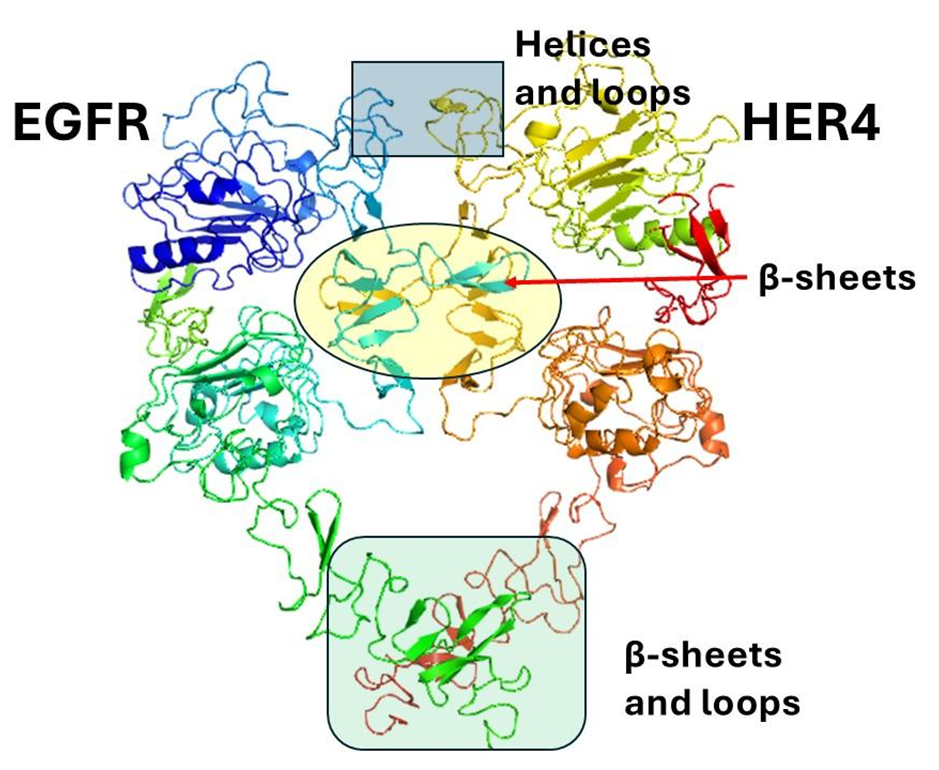

This model can be used to study the details of the interaction surface of proteins and design an inhibitor. You will see some examples of drug design in Module 3.

## 📓 **Assignment**
The crystal structure of the complex of Robo-1 and Slit2 proteins is elucidated. Use the PDB ID 2V9T. Using Pymol, open the crystal structure of the complex, separate the structures of Robo-1 and Slit-2 proteins in the complex, and save them as separate PDB files. Use the Cluspro for docking Robo-1 and Slit2. Analyze the results and choose the best model. Compare this model with the crystal structure of Robo-1 and Slit2.
